In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import sklearn
from sklearn import preprocessing
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import StratifiedKFold

Using TensorFlow backend.


In [2]:
df_ns2=pd.read_csv('KiKNet_smoothFAS_updated_28Dec20_NS2.csv')
df_ew2=pd.read_csv('KiKNet_smoothFAS_updated_28Dec20_EW2.csv')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df=df_ns2[['MT_Magnitude_','rjb_0','Vs30','D5_75_NS2','D20_80_NS2','D5_95_NS2','D5_75_EW2','D20_80_EW2','D5_95_EW2']]

In [5]:
from scipy import stats
df['_5_75']=stats.gmean(df.loc[:,['D5_75_EW2','D5_75_NS2']], axis=1)
df['_20_80']=stats.gmean(df.loc[:,['D20_80_EW2','D20_80_NS2']], axis=1)
df['_5_95']=stats.gmean(df.loc[:,['D5_95_EW2','D5_95_NS2']], axis=1)

C:\Users\Dev\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Dev\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Dev\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

In [6]:
df=df.reset_index()
df.shape

(59011, 13)

In [7]:
df.dropna(axis=0,inplace=True)

In [8]:
df

,index,MT_Magnitude_,rjb_0,Vs30,D5_75_NS2,D20_80_NS2,D5_95_NS2,D5_75_EW2,D20_80_EW2,D5_95_EW2,_5_75,_20_80,_5_95
0,0,5.0,201.366205,241.153846,18.755,17.205,32.665,15.670,14.035,30.665,17.143245,15.539375,31.649206
1,1,5.0,212.569993,301.324503,25.350,11.890,39.275,26.860,12.985,41.555,26.094080,12.425444,40.398919
2,2,5.0,160.594546,428.100722,19.135,5.295,25.105,4.320,3.665,9.920,9.091930,4.405244,15.781052
3,3,5.0,195.256405,448.533640,26.155,6.425,33.085,15.705,4.245,21.410,20.267320,5.222463,26.614843
4,4,5.0,220.505360,274.027568,31.625,10.610,43.535,28.405,11.245,42.955,29.971789,10.922887,43.244028
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59006,59006,3.6,48.584792,371.462264,4.490,3.750,13.260,3.460,1.760,9.290,3.941497,2.569047,11.098892
59007,59007,3.6,70.884798,328.979157,5.600,6.870,17.760,6.520,6.360,19.840,6.042516,6.610083,18.771212
59008,59008,3.6,52.028046,343.678161,4.810,5.460,15.090,5.640,6.250,18.750,5.208493,5.841661,16.820746
59009,59009,3.6,34.276865,573.596358,2.530,2.600,8.140,3.940,4.190,11.120,3.157246,3.300606,9.514032


In [9]:
input_var=df[['MT_Magnitude_','rjb_0']]
input_var

,MT_Magnitude_,rjb_0
0,5.0,201.366205
1,5.0,212.569993
2,5.0,160.594546
3,5.0,195.256405
4,5.0,220.505360
...,...,...
59006,3.6,48.584792
59007,3.6,70.884798
59008,3.6,52.028046
59009,3.6,34.276865


In [10]:
y_var=df[['_5_95']]
y_var=np.log(y_var)
y_var=np.array(y_var)
y_var


array([[3.45471305],
       [3.69880302],
       [2.75880998],
       ...,
       [2.82261301],
       [2.25276773],
       [2.77567799]])

In [11]:
X_train, X_test, y_train, y_test=train_test_split(input_var,y_var,test_size=0.2,random_state=2)

In [12]:
mean_mag=X_train[['MT_Magnitude_']].mean()
std_mag=X_train[['MT_Magnitude_']].std()

mean_dis=X_train[['rjb_0']].mean()
std_dis=X_train[['rjb_0']].std()

print(mean_mag)
print(std_mag)

print(mean_dis)
print(std_dis)

MT_Magnitude_    4.536197
dtype: float64
MT_Magnitude_    0.769804
dtype: float64
rjb_0    113.709563
dtype: float64
rjb_0    67.130284
dtype: float64


In [13]:
X_train=preprocessing.scale(X_train)
X_train

array([[ 0.21278805, -1.09723007],
       [-0.43673527, -0.81643295],
       [ 0.08288338,  0.26813339],
       ...,
       [-0.43673527, -0.23729237],
       [-0.43673527, -0.06117202],
       [ 1.771644  , -0.06135486]])

In [14]:
X_test['MT_Magnitude_']=(X_test['MT_Magnitude_']-4.536197)/0.769804
X_test['rjb_0']=(X_test['rjb_0']-113.709563)/67.130284

C:\Users\Dev\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Dev\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [15]:
X_test=np.array(X_test)

In [16]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD

In [17]:
model1=Sequential([Dense(units=5, input_shape=(2,), activation='relu'),
                 
                  Dense(units=1, activation='linear')
                 ])

In [18]:
model1.compile(optimizer=Adam(learning_rate=0.01),loss='mean_squared_error')

Train on 38733 samples, validate on 4304 samples
Epoch 1/10
38733/38733 [==============================] - 1s 18us/step - loss: 1.1992 - val_loss: 0.3109
Epoch 2/10
38733/38733 [==============================] - 1s 16us/step - loss: 0.2931 - val_loss: 0.3000
Epoch 3/10
38733/38733 [==============================] - 1s 15us/step - loss: 0.2806 - val_loss: 0.2906
Epoch 4/10
38733/38733 [==============================] - 1s 16us/step - loss: 0.2753 - val_loss: 0.2868
Epoch 5/10
38733/38733 [==============================] - 1s 16us/step - loss: 0.2733 - val_loss: 0.2875
Epoch 6/10
38733/38733 [==============================] - 1s 15us/step - loss: 0.2725 - val_loss: 0.2905
Epoch 7/10
38733/38733 [==============================] - 1s 14us/step - loss: 0.2729 - val_loss: 0.2867
Epoch 8/10
38733/38733 [==============================] - 1s 14us/step - loss: 0.2728 - val_loss: 0.2864
Epoch 9/10
38733/38733 [==============================] - 1s 17us/step - loss: 0.2733 - val_loss: 0.2888
Epoch 

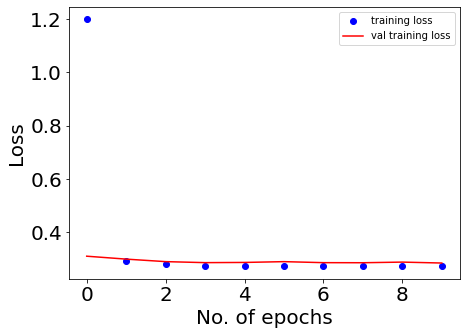

In [19]:
history=model1.fit(X_train, y_train,batch_size=128, epochs=10, validation_split=0.1, verbose=1)
history_dict=history.history
    
loss_values= history_dict['loss']
val_loss_values=history_dict['val_loss']
plt.figure(figsize=(7,5))

plt.plot(loss_values, 'bo', label='training loss')
plt.plot(val_loss_values, 'r', label='val training loss')
plt.legend(fontsize=10)


plt.ylabel('Loss' ,fontsize=20)
plt.xlabel('No. of epochs', fontsize=20)


plt.tick_params(axis='both', which='major', labelsize=20)


In [20]:
y_train_pred=model1.predict(X_train)
y_test_pred=model1.predict(X_test)

print('R2 score on train set is :\t{:0.3f}'.format(r2_score(y_train, y_train_pred)))
print('R2 score on test set is :\t{:0.3f}'.format(r2_score(y_test, y_test_pred)))

R2 score on train set is :	0.402
R2 score on test set is :	0.414


Text(0.5, 1.0, 'Duration 5-95')

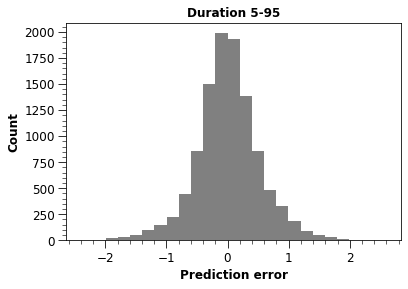

In [21]:
error=y_test_pred-y_test

plt.figure(figsize=(6,4))

plt.hist(error, bins=25, color='grey')

plt.xlabel('Prediction error',fontsize=12,weight='bold')
plt.ylabel('Count',fontsize=12,weight='bold')
plt.tick_params(axis='both', which='major', labelsize=12, length=8)
plt.tick_params(axis='both', which='minor', labelsize=8, length=4)
plt.minorticks_on()
plt.title('Duration 5-95', fontsize=12,weight='bold')

<Figure size 432x288 with 0 Axes>

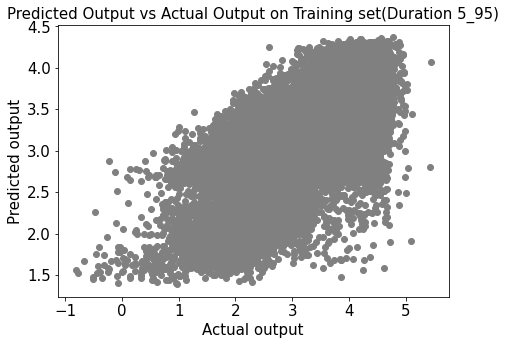

<Figure size 432x288 with 0 Axes>

In [22]:
plt.figure(figsize=(7,5))
plt.plot(y_train, y_train_pred, 'o', color='grey')
plt.xlabel('Actual output',fontsize=15)
plt.ylabel('Predicted output',fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.title('Predicted Output vs Actual Output on Training set(Duration 5_95)', fontsize=15)

plt.figure()

<Figure size 432x288 with 0 Axes>

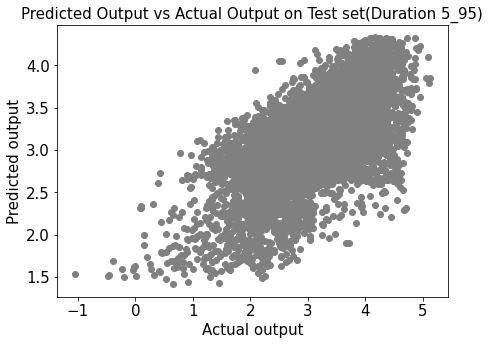

<Figure size 432x288 with 0 Axes>

In [23]:
plt.figure(figsize=(7,5))
plt.plot(y_test, y_test_pred, 'o', color='grey')
plt.xlabel('Actual output',fontsize=15)
plt.ylabel('Predicted output',fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.title('Predicted Output vs Actual Output on Test set(Duration 5_95)', fontsize=15)

plt.figure()


In [24]:
print(input_var['rjb_0'].mean())
print(input_var['rjb_0'].std())

113.95795415776564
67.22271308145844


In [25]:
X_data=np.array(preprocessing.scale(input_var))
X_data

array([[ 0.60218713,  1.30029062],
       [ 0.60218713,  1.46695887],
       [ 0.60218713,  0.69376887],
       ...,
       [-1.21555841, -0.9212732 ],
       [-1.21555841, -1.18534087],
       [-1.21555841, -0.95412353]])

In [26]:
y_pred=model1.predict(X_data)
y_pred

array([[3.4979942],
       [3.5339186],
       [3.3672626],
       ...,
       [2.6442378],
       [2.526645 ],
       [2.637157 ]], dtype=float32)

In [27]:
output_y=df[['_5_95']]
output_y=np.log(output_y)
output_y

,_5_95
0,3.454713
1,3.698803
2,2.758810
3,3.281469
4,3.766859
...,...
59006,2.406845
59007,2.932324
59008,2.822613
59009,2.252768


In [28]:
residual=output_y-y_pred
residual.max()

_5_95    3.183824
dtype: float64

In [29]:
mag=input_var['MT_Magnitude_']
dis=input_var['rjb_0']


In [30]:
calc=pd.concat([mag,dis,residual], axis=1)
calc.shape

(53797, 3)

In [31]:
a=[]
for i in np.arange(3.5,7.5,0.5):
    b=calc[(calc.MT_Magnitude_ >= i ) & (calc.MT_Magnitude_ <=i+0.5)]._5_95.mean()
    a.append(b)
    
a=np.array(a)
a


array([ 0.01452313, -0.01404474, -0.03703995,  0.00704312,  0.00760585,
        0.00011022,  0.02464091,  0.0636514 ])

In [32]:
from numpy import arange
c=[]
for i in arange(3.5,7.5,0.5):
    c.append(i)

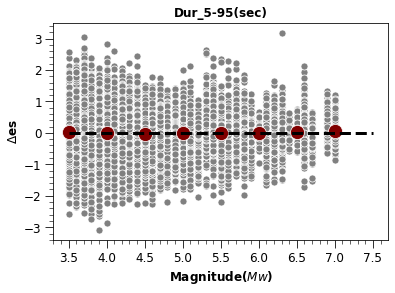

In [33]:
x=input_var['MT_Magnitude_']
y=residual['_5_95']
plt.figure(figsize=(6,4))
plt.hlines(y=0,xmin=3.5, xmax=7.5,color='k',linestyle='--',lw=3)
#sns.scatterplot(d,a, marker='o', color='red',s=200)
sns.scatterplot(x,y, marker='o', color='grey', s=50)
sns.scatterplot(c,a, marker='o',s=200,color= 'maroon')
plt.ylabel('$\Delta$es', size=12, weight='bold')
plt.xlabel('Magnitude($Mw$)', size=12,weight='bold')
#plt.xlim(0,150)
plt.tick_params(axis='both', which='major', labelsize=12,length=8)
plt.title('Dur_5-95(sec)',weight='bold')
plt.minorticks_on()
plt.tick_params(axis='both', which='minor', labelsize=8,length=4)


In [34]:
a=[]
for i in np.arange(0,300,25):
    b=calc[(calc.rjb_0 >= i ) & (calc.rjb_0 <=i+25)]._5_95.mean()
    a.append(b)
    
a=np.array(a)
a


array([ 0.07320587,  0.01082057,  0.04112351,  0.01488792, -0.02215024,
       -0.05780931, -0.06210506, -0.01733092,  0.00222384, -0.01023468,
       -0.02878212, -0.08708017])

In [35]:
c=[]
for i in range(0,300,25):
    c.append(i)
c    

[0, 25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275]

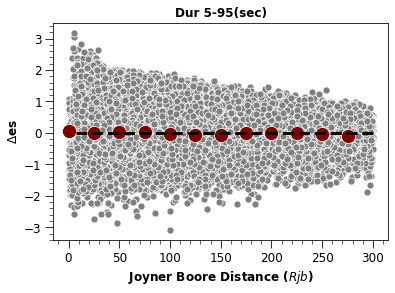

In [36]:
x=input_var['rjb_0']
y=residual['_5_95']
plt.figure(figsize=(6,4))
plt.hlines(y=0,xmin=300, xmax=7.5,color='k',linestyle='--',lw=3)
#sns.scatterplot(d,a, marker='o', color='red',s=200)
sns.scatterplot(x,y, marker='o', color='grey', s=50)
sns.scatterplot(c,a, marker='o',s=200,color= 'maroon')
plt.ylabel('$\Delta$es', size=12, weight='bold')

plt.xlabel('Joyner Boore Distance ($Rjb$)', size=12, weight='bold')
#plt.xlim(0,150)
plt.tick_params(axis='both', which='major', labelsize=12, length=8)
plt.title('Dur 5-95(sec)',weight='bold')
plt.minorticks_on()
plt.tick_params(axis='both', which='minor', labelsize=8,length=4)

In [37]:
df1=pd.read_csv('borehole_data.csv')
df1.isnull().any()

Unnamed: 0       False
index            False
Code             False
Address          False
Vs30             False
MT_Magnitude_    False
rjb_0            False
_5_75            False
_20_80           False
_5_95            False
AI               False
CAV              False
dtype: bool

In [38]:
input_var=df1[['MT_Magnitude_','rjb_0']]

In [39]:
y_var=df1[['_5_95']]
y_var=np.log(y_var)
y_var=np.array(y_var)
y_var

array([[3.44102395],
       [3.90830856],
       [4.47067833],
       ...,
       [2.59380462],
       [2.60798935],
       [2.51734645]])

In [40]:
X_train, X_test, y_train, y_test=train_test_split(input_var,y_var,test_size=0.2,random_state=2)

In [41]:
X_train=preprocessing.scale(X_train)
X_test=preprocessing.scale(X_test)

In [42]:
from tensorflow.keras.optimizers import Adam

In [43]:
model2=Sequential([Dense(units=5, input_shape=(2,), activation='relu'),
                 
                  Dense(units=1, activation='linear')
                 ])

In [44]:
model2.compile(optimizer=Adam(learning_rate=0.01),loss='mean_squared_error')

Train on 37620 samples, validate on 4180 samples
Epoch 1/20
37620/37620 [==============================] - 1s 19us/step - loss: 0.9000 - val_loss: 0.2735
Epoch 2/20
37620/37620 [==============================] - 1s 18us/step - loss: 0.2623 - val_loss: 0.2569
Epoch 3/20
37620/37620 [==============================] - 1s 17us/step - loss: 0.2468 - val_loss: 0.2422
Epoch 4/20
37620/37620 [==============================] - 1s 17us/step - loss: 0.2391 - val_loss: 0.2362
Epoch 5/20
37620/37620 [==============================] - 1s 18us/step - loss: 0.2368 - val_loss: 0.2343
Epoch 6/20
37620/37620 [==============================] - 1s 18us/step - loss: 0.2361 - val_loss: 0.2346
Epoch 7/20
37620/37620 [==============================] - 1s 17us/step - loss: 0.2347 - val_loss: 0.2359
Epoch 8/20
37620/37620 [==============================] - 1s 17us/step - loss: 0.2346 - val_loss: 0.2321
Epoch 9/20
37620/37620 [==============================] - 1s 16us/step - loss: 0.2346 - val_loss: 0.2332
Epoch 

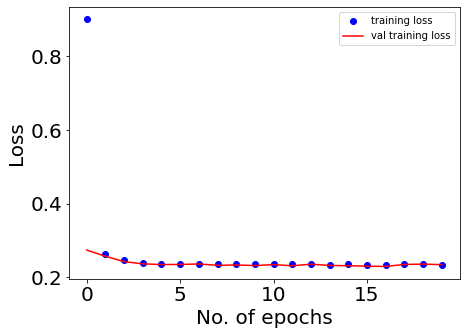

In [45]:
history=model2.fit(X_train, y_train,batch_size=128, epochs=20, validation_split=0.1, verbose=1)
history_dict=history.history
    
loss_values= history_dict['loss']
val_loss_values=history_dict['val_loss']
plt.figure(figsize=(7,5))

plt.plot(loss_values, 'bo', label='training loss')
plt.plot(val_loss_values, 'r', label='val training loss')
plt.legend(fontsize=10)


plt.ylabel('Loss' ,fontsize=20)
plt.xlabel('No. of epochs', fontsize=20)


plt.tick_params(axis='both', which='major', labelsize=20)


In [46]:
y_train_pred=model2.predict(X_train)
y_test_pred=model2.predict(X_test)

print('R2 score on train set is :\t{:0.3f}'.format(r2_score(y_train, y_train_pred)))
print('R2 score on test set is :\t{:0.3f}'.format(r2_score(y_test, y_test_pred)))

R2 score on train set is :	0.516
R2 score on test set is :	0.525


Text(0.5, 1.0, 'Duration 5-95(Borehole)')

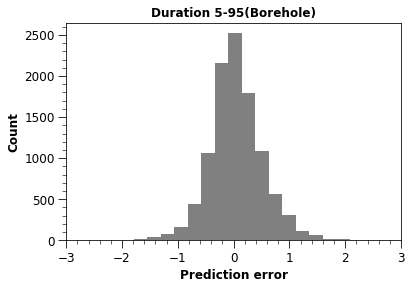

In [47]:
error=y_test_pred-y_test

plt.figure(figsize=(6,4))

plt.hist(error, bins=25, color='grey')

plt.xlabel('Prediction error',fontsize=12,weight='bold')
plt.xlim(-3,3)
plt.ylabel('Count',fontsize=12,weight='bold')
plt.tick_params(axis='both', which='major', labelsize=12, length=8)
plt.tick_params(axis='both', which='minor', labelsize=8, length=4)
plt.minorticks_on()
plt.title('Duration 5-95(Borehole)', fontsize=12,weight='bold')

In [48]:
X_data=np.array(preprocessing.scale(input_var))
X_data

array([[ 0.58977663,  1.76886648],
       [ 2.1410688 ,  1.37557327],
       [ 2.1410688 ,  1.58582329],
       ...,
       [-1.22006423, -0.92183128],
       [-1.22006423, -1.18504777],
       [-1.22006423, -0.95457571]])

In [49]:
y_pred=model2.predict(X_data)
y_pred

array([[3.7229555],
       [4.154737 ],
       [4.1886506],
       ...,
       [2.7111897],
       [2.6687331],
       [2.705908 ]], dtype=float32)

In [50]:
output_y=df1[['_5_95']]
output_y=np.log(output_y)
output_y

,_5_95
0,3.441024
1,3.908309
2,4.470678
3,4.357006
4,4.321971
...,...
52246,2.883470
52247,3.105369
52248,2.593805
52249,2.607989


In [51]:
residual=output_y-y_pred
residual.max()

_5_95    3.222488
dtype: float64

In [52]:
mag=input_var['MT_Magnitude_']
dis=input_var['rjb_0']

In [53]:
calc=pd.concat([mag,dis,residual], axis=1)
calc.shape

(52251, 3)

In [54]:
a=[]
for i in np.arange(3.5,7.5,0.5):
    b=calc[(calc.MT_Magnitude_ >= i ) & (calc.MT_Magnitude_ <=i+0.5)]._5_95.mean()
    a.append(b)
    
a=np.array(a)
a


array([-0.04490557, -0.04842051, -0.02354524, -0.01143978, -0.04163601,
       -0.11335721, -0.24576684, -0.2153786 ])

In [55]:
from numpy import arange
c=[]
for i in arange(3.5,7.5,0.5):
    c.append(i)

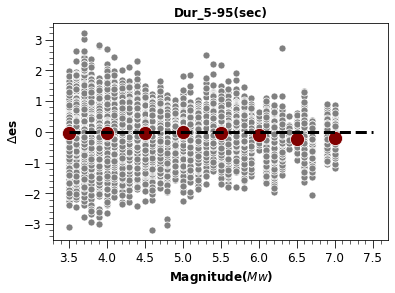

In [56]:
x=input_var['MT_Magnitude_']
y=residual['_5_95']
plt.figure(figsize=(6,4))
plt.hlines(y=0,xmin=3.5, xmax=7.5,color='k',linestyle='--',lw=3)
#sns.scatterplot(d,a, marker='o', color='red',s=200)
sns.scatterplot(x,y, marker='o', color='grey', s=50)
sns.scatterplot(c,a, marker='o',s=200,color= 'maroon')
plt.ylabel('$\Delta$es', size=12, weight='bold')
plt.xlabel('Magnitude($Mw$)', size=12,weight='bold')
#plt.xlim(0,150)
plt.tick_params(axis='both', which='major', labelsize=12,length=8)
plt.title('Dur_5-95(sec)',weight='bold')
plt.minorticks_on()
plt.tick_params(axis='both', which='minor', labelsize=8,length=4)

In [57]:
a=[]
for i in np.arange(0,300,25):
    b=calc[(calc.rjb_0 >= i ) & (calc.rjb_0 <=i+25)]._5_95.mean()
    a.append(b)
    
a=np.array(a)
a


array([-0.08929641, -0.10932034, -0.01365689, -0.03190277, -0.04353508,
       -0.06906626, -0.06811549, -0.02708637,  0.02693987,  0.01778744,
        0.00155837, -0.0441132 ])

In [58]:
c=[]
for i in range(0,300,25):
    c.append(i)
c    

[0, 25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275]

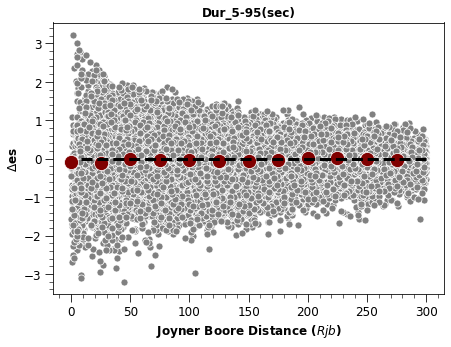

In [59]:
x=input_var['rjb_0']
y=residual['_5_95']
plt.figure(figsize=(7,5))
plt.hlines(y=0,xmin=300, xmax=7.5,color='k',linestyle='--',lw=3)
#sns.scatterplot(d,a, marker='o', color='red',s=200)
sns.scatterplot(x,y, marker='o', color='grey', s=50)
sns.scatterplot(c,a, marker='o',s=200,color= 'maroon')
plt.ylabel('$\Delta$es', size=12, weight='bold')
plt.xlabel('Joyner Boore Distance ($Rjb$)', size=12,weight='bold')
#plt.xlim(0,150)

plt.title('Dur_5_95')
plt.tick_params(axis='both', which='major', labelsize=12,length=8)
plt.title('Dur_5-95(sec)',weight='bold')
plt.minorticks_on()
plt.tick_params(axis='both', which='minor', labelsize=8,length=4)


In [60]:
Mag1=[]
i=0
while i<28:
    Mag1.append(7.5)
    i+=1
Dis1=[]
for i in range(20,300,10):
    a=i+10
    Dis1.append(a)

In [61]:
Mag1=np.array(Mag1)
Dis1=np.array(Dis1)
li2=[Mag1,Dis1]
df2=pd.DataFrame(li2)
df2=df2.T
df2.columns=['Mag','Dis']
df2

,Mag,Dis
0,7.5,30.0
1,7.5,40.0
2,7.5,50.0
3,7.5,60.0
4,7.5,70.0
5,7.5,80.0
6,7.5,90.0
7,7.5,100.0
8,7.5,110.0
9,7.5,120.0


In [62]:
mag=[]
dis=[]

for i in range(0,28):
    mag_new=(Mag1[i]-4.543165)/0.774058
    dis_new=(Dis1[i]-114.286183)/67.408356
    
    mag.append(mag_new)
    dis.append(dis_new)

In [63]:
li3=[mag,dis]
df3=pd.DataFrame(li3)
df3=df3.T
df3.columns=['Mag','Dis']
X_data=np.array(df3)
X_data

array([[ 3.81991401, -1.25038182],
       [ 3.81991401, -1.10203226],
       [ 3.81991401, -0.9536827 ],
       [ 3.81991401, -0.80533314],
       [ 3.81991401, -0.65698358],
       [ 3.81991401, -0.50863402],
       [ 3.81991401, -0.36028446],
       [ 3.81991401, -0.2119349 ],
       [ 3.81991401, -0.06358534],
       [ 3.81991401,  0.08476422],
       [ 3.81991401,  0.23311378],
       [ 3.81991401,  0.38146335],
       [ 3.81991401,  0.52981291],
       [ 3.81991401,  0.67816247],
       [ 3.81991401,  0.82651203],
       [ 3.81991401,  0.97486159],
       [ 3.81991401,  1.12321115],
       [ 3.81991401,  1.27156071],
       [ 3.81991401,  1.41991027],
       [ 3.81991401,  1.56825983],
       [ 3.81991401,  1.71660939],
       [ 3.81991401,  1.86495895],
       [ 3.81991401,  2.01330851],
       [ 3.81991401,  2.16165807],
       [ 3.81991401,  2.31000763],
       [ 3.81991401,  2.4583572 ],
       [ 3.81991401,  2.60670676],
       [ 3.81991401,  2.75505632]])

In [64]:
y_pred1=model1.predict(X_data)
y_pred1=np.exp(y_pred1)
y_pred1.max()

83.66369

In [65]:
y_pred2=model2.predict(X_data)
y_pred2=np.exp(y_pred2)
y_pred2.max()

136.07233

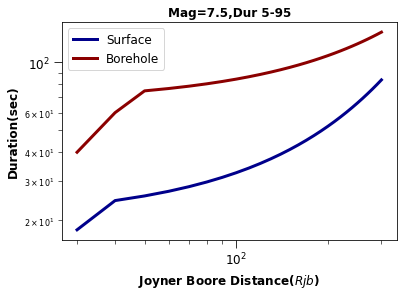

In [66]:
plt.figure(figsize=(6,4))
plt.xscale('log')
plt.yscale('log')
plt.plot(df2['Dis'],y_pred1, color='darkblue', label='Surface', lw=3)
plt.plot(df2['Dis'],y_pred2, color='darkred',label='Borehole', lw=3)
#plt.axis([10, 1000, 10,100])
plt.legend(fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=12, length=8)
plt.ylabel('Duration(sec)', size=12,weight='bold')
plt.xlabel('Joyner Boore Distance($Rjb$)', size=12, weight='bold')
plt.title("Mag=7.5,Dur 5-95",size=12, weight='bold')
plt.minorticks_on()
plt.tick_params(axis='both', which='minor', labelsize=8,length=4)


In [67]:
Dis2=[]
i=0
while i<6:
    Dis2.append(300)
    i+=1
Mag2=[]
for i in range(2,8):
    a=i+1
    Mag2.append(a)
    


In [68]:
Mag2=np.array(Mag2)
Dis2=np.array(Dis2)
Mag2
Dis2

array([300, 300, 300, 300, 300, 300])

In [69]:
li4=[Mag2,Dis2]
df4=pd.DataFrame(li4)
df4=df4.T
df4.columns=['Mag','Dis']
df4

,Mag,Dis
0,3,300
1,4,300
2,5,300
3,6,300
4,7,300
5,8,300


In [70]:
mag=[]
dis=[]

for i in range(0,6):
    mag_new=(Mag2[i]-4.543165)/0.774058
    dis_new=(Dis2[i]-114.286183)/67.408356
    
    mag.append(mag_new)
    dis.append(dis_new)
    

In [71]:
li5=[mag,dis]
df5=pd.DataFrame(li5)
df5=df5.T
df5.columns=['Mag','Dis']
X_data=np.array(df5)
X_data

array([[-1.99360384,  2.75505632],
       [-0.70171098,  2.75505632],
       [ 0.59018187,  2.75505632],
       [ 1.88207473,  2.75505632],
       [ 3.17396758,  2.75505632],
       [ 4.46586044,  2.75505632]])

In [72]:
y_pred1=model1.predict(X_data)
y_pred1=np.exp(y_pred1)
y_pred1.max()

88.96229

In [73]:
y_pred2=model2.predict(X_data)
y_pred2=np.exp(y_pred2)
y_pred2.max()

167.23373

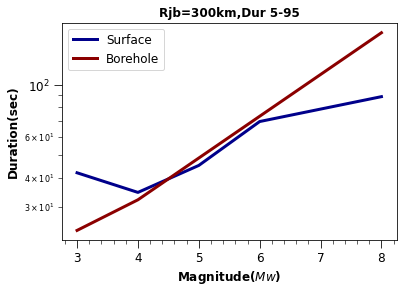

In [74]:
plt.figure(figsize=(6,4))
#plt.xscale('log')
plt.yscale('log')
plt.plot(df4['Mag'],y_pred1, color='darkblue', label='Surface', lw=3)
plt.plot(df4['Mag'],y_pred2, color='darkred',label='Borehole', lw=3)
#plt.axis([10, 1000, 10,100])
plt.legend(fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=12, length=8)
plt.ylabel('Duration(sec)', size=12,weight='bold')
plt.xlabel('Magnitude($Mw$)', size=12, weight='bold')
plt.title("Rjb=300km,Dur 5-95",size=12, weight='bold')
plt.minorticks_on()
plt.tick_params(axis='both', which='minor', labelsize=8,length=4)
